In [36]:
!pip install category_encoders

Useful links for Ensemble Models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# 1. Load Data

In [38]:
# Load data
url = "https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true"
data = pd.read_csv(url, encoding = "ISO-8859-1")
print("The shape of the data: ", data.shape)
data.head(10)

The shape of the data:  (48842, 11)


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


## EDA 

See [6070-CA03-Decision-Tree-Algorithm](https://github.com/oliverlintl/6070-CA03-Decision-Tree-Algorithm)

## Preping data for model building


In [39]:
# Train test split
x_cols = ['hours_per_week_bin',	'occupation_bin', 'msr_bin',	'capital_gl_bin',	'race_sex_bin',	'education_num_bin',	'education_bin',	'workclass_bin',	'age_bin'] # select variables we are interested in
X_train, X_test, y_train, y_test = train_test_split(data[x_cols], data['y'], random_state=101)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

      hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
387              a. 0-30   b. Mid - Low  c. High         b. < 0       b. Mid   
10835           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
45084           b. 31-40   b. Mid - Low   a. Low         a. = 0      c. High   
11993   d. 41-50 & 61-70        e. High  c. High         b. < 0      c. High   
12769           b. 31-40        e. High  c. High         a. = 0       b. Mid   

      education_num_bin education_bin workclass_bin            age_bin  
387             b. 9-12        b. Mid     b. income           e. 40-55  
10835             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  
45084            a. 0-8        a. Low     b. income            a. 0-25  
11993             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  
12769             d. 14    d. Masters     b. income           e. 40-55  
387      1
10835    0
45084    0
11993    0
12769    0
Name: y, dtype: int64
    

In [40]:
# using ordinal encoder to convert string variables into float variable because Decision tree classifier cannot take strings as input
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = x_cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
# Examine X_train, y_train
print(X_train.head())
print(y_train.head())

       hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
387                     1               1        1               1   
10835                   2               2        1               2   
45084                   2               1        2               2   
11993                   3               3        1               1   
12769                   2               3        1               2   

       race_sex_bin  education_num_bin  education_bin  workclass_bin  age_bin  
387               1                  1              1              1        1  
10835             1                  2              2              1        2  
45084             2                  3              3              1        3  
11993             2                  2              2              1        4  
12769             1                  4              4              1        1  
387      1
10835    0
45084    0
11993    0
12769    0
Name: y, dtype: int64


# Model Building and Finding Optimal Hyper-parameters

#I. Random Forest Classifier 



## 2. finding optimal value of a key hyper-parameter

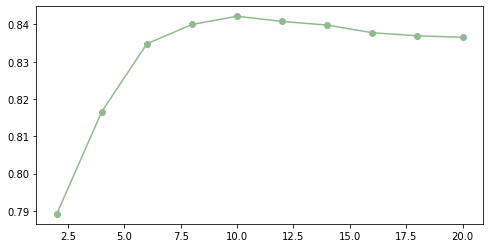

In [42]:
# looping through a list of numbers as max depth options to find the optimal max_depth
results = []
max_depth_option = [2,4,6,8,10,12,14,16,18,20]
for depth in max_depth_option:
    model = RandomForestClassifier(max_depth=depth, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_option).plot(color = 'darkseagreen', marker='o')
# run time 18s

The optimal max depth appears to be 10

## 3. building a random forest model


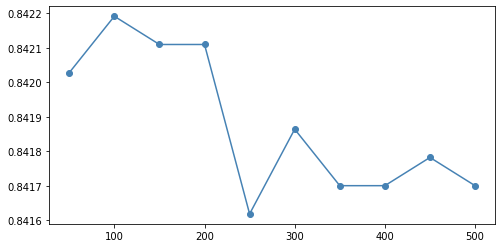

In [43]:
# looping through a list of numbers as estimator options to find the optimal n_estimator
results = []
n_estimator_option = [50,100,150,200,250,300,350,400,450,500]
for n_estimator in n_estimator_option:
    model = RandomForestClassifier(n_estimators = n_estimator, max_depth=10, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_option).plot(color = 'steelblue', marker='o')
# run time 49s

Answers:
1. the accuracy of the model seems to increase when number of estimators increase from 50 to 100. And it sees a small decline after that. And it sees a drastic drop when the number of estimators is above 200.
2. The optimal number of estimator appears to be 100

## Find optimized hyper-param for Adaboost

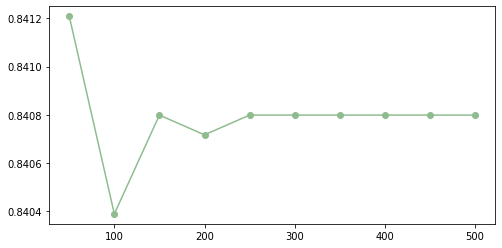

In [44]:
# looping through a list of numbers as estimator options to find the optimal n_estimator
results = []
n_estimator_option = [50,100,150,200,250,300,350,400,450,500]
for n_estimator in n_estimator_option:
    model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_option).plot(color = 'darkseagreen', marker='o')
# runtime 60 sec

The optimized number of estimator is 50. Although, the accuracy does not really change by a lot as the number of estimator changes. 

## Find optimized hyper-param for Gradient Boosting Classifier

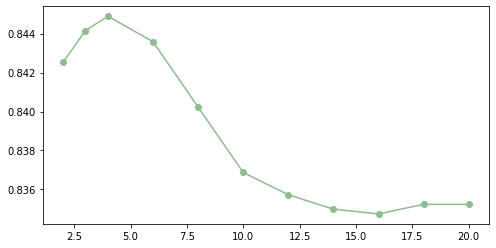

In [45]:
# looping through a list of numbers as max depth options to find the optimal max_depth
results = []
max_depth_option = [2,3,4,6,8,10,12,14,16,18,20]
for depth in max_depth_option:
    model = GradientBoostingClassifier(max_depth=depth, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_option).plot(color = 'darkseagreen', marker='o')
# run time 1 min 49s

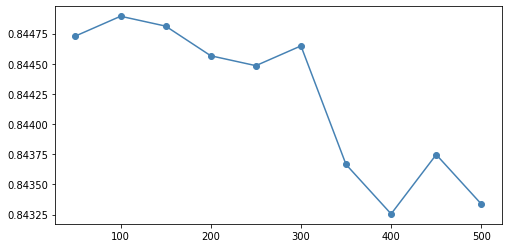

In [46]:
# looping through a list of numbers as estimator options to find the optimal n_estimator
results = []
n_estimator_option = [50,100,150,200,250,300,350,400,450,500]
for n_estimator in n_estimator_option:
    model = GradientBoostingClassifier(n_estimators = n_estimator, max_depth=4, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_option).plot(color = 'steelblue', marker='o')
# run time 49s

For Gradient Boosting Classifier, the optimized n_estimators is 100, and max depth is 4

## Find optimized hyper-param for XGB Classifier

https://www.datatechnotes.com/2019/07/classification-example-with.html

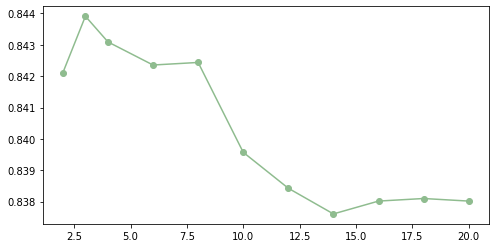

In [47]:
# looping through a list of numbers as max depth options to find the optimal max_depth
results = []
max_depth_option = [2,3,4,6,8,10,12,14,16,18,20]
for depth in max_depth_option:
    model = XGBClassifier(max_depth=depth, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_option).plot(color = 'darkseagreen', marker='o')
# run time 1 min 12s

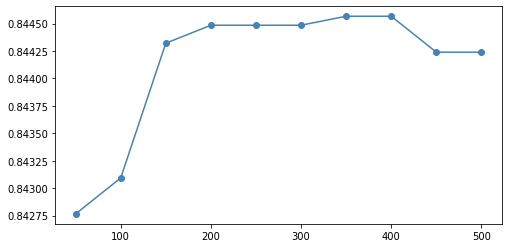

In [48]:
# looping through a list of numbers as estimator options to find the optimal n_estimator
results = []
n_estimator_option = [50,100,150,200,250,300,350,400,450,500]
for n_estimator in n_estimator_option:
    model =  XGBClassifier(n_estimators = n_estimator, max_depth=4, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_option).plot(color = 'steelblue', marker='o')
# run time 58s

## 5. Compare Performance

In [49]:
max_depth = 5
n_estimator = 100

rf = RandomForestClassifier(n_estimators = n_estimator, max_depth=max_depth, random_state=101)
ada = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
gb = GradientBoostingClassifier(n_estimators = n_estimator, max_depth=max_depth, random_state=101)
xgb =  XGBClassifier(n_estimators = n_estimator, max_depth=max_depth, random_state=101)

rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)

xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [57]:
# get all accuracy scores and auc into lists
pred_list = [rf_y_pred, ada_y_pred, gb_y_pred, xgb_y_pred]

acc_list = []
auc_list = []
for pred in pred_list:
  accuracy = accuracy_score(y_test, pred)
  auc = roc_auc_score(y_test, pred)
  acc_list.append(accuracy)
  auc_list.append(auc)

In [58]:
comparison = pd.DataFrame([acc_list, auc_list], columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'])
comparison

,Random Forest,AdaBoost,Gradient Boost,XGB
0,0.831545,0.840390,0.843420,0.844075
1,0.693869,0.742689,0.757084,0.756357
